<a href="https://colab.research.google.com/github/viniciusAAferreira/Projeto-Ciencia-de-Dados/blob/main/TP_CCF425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Trabalho 1

Para esse trabalho foi solicitado que o grupo faça uma análise dos dados referentes ao alunos da UFV. Para isso o grupo formulou 10 perguntas para ajudar a guiar na análise e entendimento dos dados.

## Grupo:
  ###### João Vitor Gonçalves Vieira - 4212
  ###### Leonardo Araujo Resende Aguiar - 4702
  ###### Vinícius Augusto Assis Ferreira - 4242
  ###### Vinícius Teixeira Prates

In [3]:
# biblioteca para ler os arquivos .ods
!pip install pandas_ods_reader
!pip install odfpy
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_ods_reader import read_ods

# monta o drive onde esta salvo o arquivo que vai ser lido
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Os dados

Nessa primeira parte vamos fazer uma pequena análise inicial dos dados, descobrindo quais os dados que estão presentes e o que pode ser útil para nós.

In [8]:
# cria o dataframe com os dados do arquivo
df = pd.read_excel('/content/drive/MyDrive/Dados de estudantes da UFV - 2022-12-12.ods')
#df = read_ods('/content/drive/MyDrive/CCF425/Dados de estudantes da UFV - 2022-12-12.ods', 1)
#df = pd.read_excel('Dados de estudantes da UFV - 2022-12-12 (2)', engine='odf')
print('Informações gerais do dataframe:')
df


Informações gerais do dataframe:


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74021,172112,1996.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,0.0
74022,172110,1995.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74023,172113,1996.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74024,172114,1998.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73971 non-null  object 
 7   Municipio_Nascimento     73990 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

Com uma breve análise podemos observar do que os dados se tratam e algumas colunas que podemos considerar importantes para o trabalho. Abaixo vamos descrever sobre as colunas mais importantes para nós:

| Variável         | Descrição     | Valores |
|--------------|-----------|------------|
| Ano_Nascimento      | Ano do nascimento do aluno  |      |
| Sexo      | Sexo do aluno  |   M ou F   |
| Campus      | Campos do aluno  |   CAV, CAF ou CAR   |
| Curso      | Curso do aluno  |      |
| UF_Nascimento      | Estado de nascimento do aluno  |      |
| Municipio_Nascimento      | Cidade de nascimento do aluno  |      |
| Admissao      | Ano de admissao do aluno  |      |
| Saida      | Ano de saida do aluno  |      |
| Situacao_Aluno_Agrupada      | Situacao possivel do aluno  |   Matriculado, Evasao, Concluido   |
| Enem      | Nota do ENEM do aluno  |      |
| Num_Reporvacoes      | Numero de reprovações do aluno  |      |
| Raca      | raça do aluno  |      |
| CRA      | CRA do aluno  |      |

In [ ]:
df.describe()

,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


# Perguntas

# 1 -  Qual é a porcentagem de alunos que evadiram de algum curso?

In [ ]:
count_total = df['Situacao_Aluno_Agrupada'].value_counts().sum()
count_evasao = df['Situacao_Aluno_Agrupada'].value_counts()['Evasão']
percent = (count_evasao * 100) / count_total
percent

38.8039337530057

**RESPOSTA:** Um total de 38,8% das pessoas evadiram algum curso na UFV em todo o período analisado.

# 2 - Qual a media do CRA das pessoas que evadiram
 

<ipython-input-9-cdd6a2e2a1cf>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt = dt.groupby("Situacao_Aluno_Agrupada").mean()['CRA'].plot(kind = 'bar',edgecolor='black')


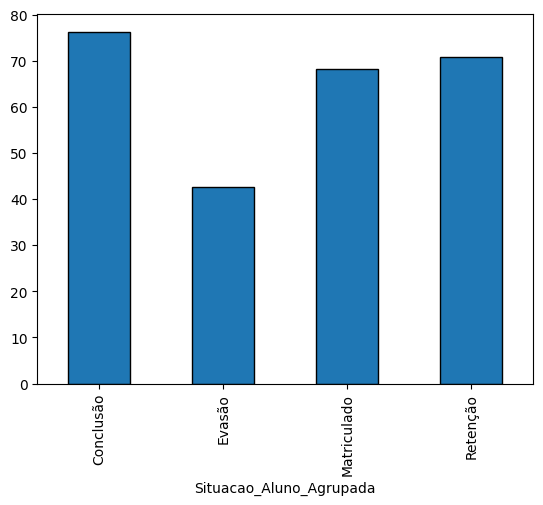

In [ ]:
dt = df
dt['Situacao_Aluno_Agrupada'].value_counts()
dt = dt.groupby("Situacao_Aluno_Agrupada").mean()['CRA'].plot(kind = 'bar',edgecolor='black')

# Ao analisar o gráfico é possível notar que o CRA dos alunos que evadiram é consideravelmente mais baixa que os outros
# Estando abaixo da nota limite para passar em cada matéria, que seria 60, provavelmente também ha uma ligação com a quantidade de reprovações

**RESPOSTA:** Ao analisar o gráfico é possível notar que o CRA dos alunos que evadiram é consideravelmente mais baixa que os outros
 Estando abaixo da nota limite para passar em cada matéria, que seria 60, provavelmente também ha uma ligação com a quantidade de reprovações

# 3 - Qual é o gênero dos alunos que mais evadem dos cursos?







Situacao_Aluno_Agrupada  Conclusão    Evasão  Matriculado  Retenção
Sexo                                                               
F                         0.468784  0.341975     0.156405  0.032836
M                         0.379526  0.434513     0.150944  0.035017


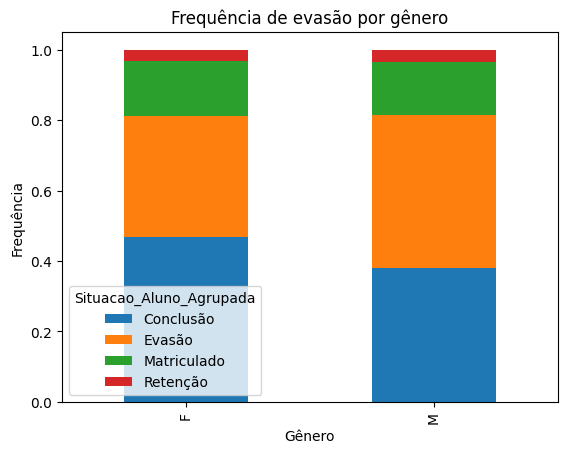

In [ ]:
#Quais são as características mais frequentes dos alunos que evadem da UFV em termos de gênero?


# Calcular frequência de evasão por gênero
freq_evasao_genero = pd.crosstab(index=df['Sexo'], columns=df['Situacao_Aluno_Agrupada'], normalize='index')

# Imprimir resultados
print(freq_evasao_genero)

# Criar gráfico de barras empilhadas
freq_evasao_genero.plot(kind='bar', stacked=True)

# Definir título do gráfico
plt.title('Frequência de evasão por gênero')

# Definir rótulos dos eixos x e y
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Exibir gráfico
plt.show()


**RESPOSTA:** Analisando o gráfico, fica evidente que as alunas apresentam uma taxa de conclusão significativamente maior em comparação aos alunos do sexo masculino. Além disso, observa-se também uma taxa de evasão mais alta entre os alunos. Essas discrepâncias sugerem uma disparidade de gênero no desempenho educacional, com as alunas tendo um desempenho melhor e uma taxa de abandono menor em relação aos alunos.

# 4 - Existem diferenças nas taxas de evasão entre cursos na UFV? Se sim, quais cursos têm as maiores taxas de evasão?

                      

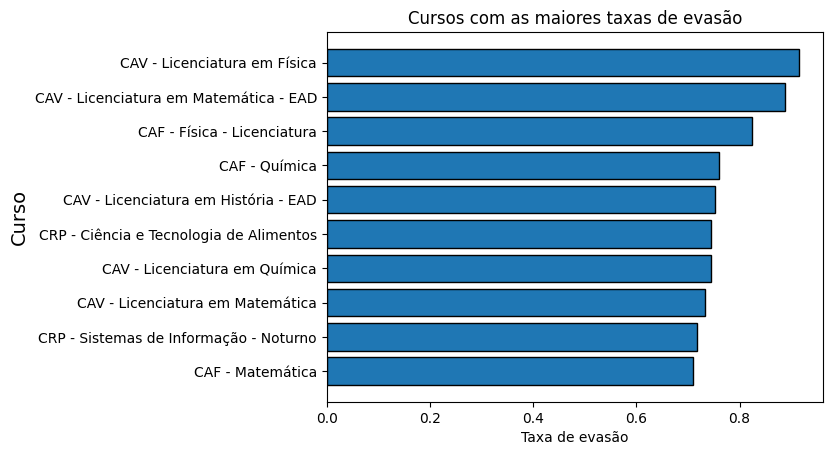

In [ ]:
# Filtrar cursos com todos os alunos evadidos ou concluídos
cursos_filtrados = df.groupby('Curso')['Situacao_Aluno_Agrupada'].apply(lambda x: set(x))
cursos_filtrados = cursos_filtrados[cursos_filtrados.apply(lambda x: len(x) > 1)].index

# Filtrar o dataframe pelos cursos selecionados
df_filtrado = df[df['Curso'].isin(cursos_filtrados)]

# Calcular a taxa de evasão para cada curso
taxa_evasao_por_curso = df_filtrado.groupby('Curso')['Situacao_Aluno_Agrupada'].apply(lambda x: (x == 'Evasão').mean())

# Ordenar os cursos pela taxa de evasão
taxa_evasao_por_curso = taxa_evasao_por_curso.sort_values(ascending=False)

cursos_mais_evasao = taxa_evasao_por_curso.head(10)

# Limitar o número de caracteres do nome do curso a 40
cursos_mais_evasao.index = ['\n'.join(textwrap.wrap(nome, width=40)) for nome in cursos_mais_evasao.index]

# Mapear sinônimos para um nome padrão
sinonimos = {
    "CAF - Física": "CAF - Física - Licenciatura",
}
cursos_mais_evasao.index = [sinonimos.get(nome, nome) for nome in cursos_mais_evasao.index]

# Criar gráfico de barras horizontais
plt.barh(cursos_mais_evasao.index, cursos_mais_evasao.values,edgecolor='black')

# Definir título do gráfico
plt.title('Cursos com as maiores taxas de evasão')

# Definir rótulos dos eixos x e y
plt.xlabel('Taxa de evasão')
plt.ylabel('Curso', fontsize=14)

# Inverter a ordem dos cursos no eixo y
plt.gca().invert_yaxis()

# Exibir gráfico
plt.show()


**RESPOSTA:** Sim, existem diferenças nas taxas de evasão entre os cursos na UFV. Ao analisar o gráfico, é possível identificar alguns cursos com índices mais altos de evasão. Entre esses cursos, destacam-se:

* CAV - Licenciatura em Física
* CAV - Licenciatura em Matemática - EAD
* CAF - Física
* CAF - Química
* CAV - Licenciatura em História - EAD
* CRP - Ciência e Tecnologia de Alimentos
* CAV - Licenciatura em Química
* CAV - Licenciatura em Matemática
* CRP - Sistemas de Informação - Noturno
* CAF - Matemática

Esses cursos apresentam índices mais elevados de evasão, indicando que os alunos podem estar enfrentando desafios ou dificuldades específicas nesses cursos. 

#5 - Quantas Pessoas Evadiram por estado?

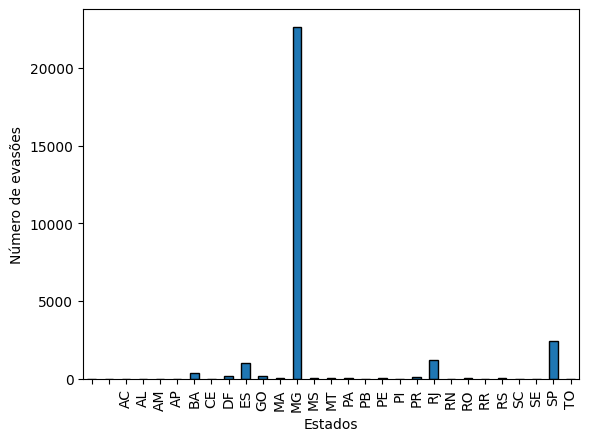

In [ ]:
df_evadidos = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']
evadidos_by_uf = df_evadidos.groupby('UF_Nascimento').count()
evadidos_by_uf['Situacao_Aluno_Agrupada'].plot(kind="bar",edgecolor='black')
plt.xlabel('Estados')
plt.ylabel('Número de evasões')
plt.show()

**RESPOSTA:** Ao analisar o gráfico acima, observamos que Minas Gerais apresentou a maior taxa de evasão.



# 6 - Os alunos com nota mais alta no ENEM têm um CRA mais alto do que os alunos com nota mais baixa no ENEM?



<ipython-input-33-fab96c5bba79>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  enem_cra = df.groupby('Faixa').mean()['CRA']


<Axes: xlabel='Faixa', ylabel='CRA'>

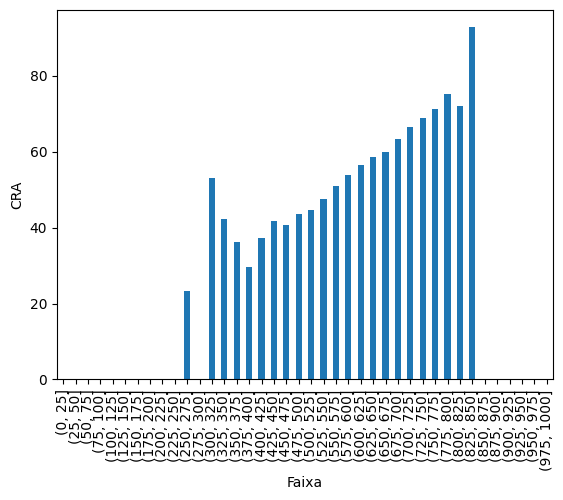

In [ ]:
enem_cra = df
enem_cra['ENEM_AGRUPADOS'] = pd.cut(df['ENEM'], bins=np.arange(0, 1001, 25))
enem_cra = df.groupby('Faixa').mean()['CRA']
plt.xlabel('Faixa nota do ENEM 25')
plt.ylabel('CRA')
enem_cra.plot(kind='bar')


**RESPOSTA:** Dividi as notas do ENEM em faixas de 25 para facilitar a visualização, observando o gráfico é possível notar que quando a nota do ENEM cresce o CRA cresce também, então há uma associação entre elas

# 7 - Os alunos que evadiram tinham mais reprovações do que os que não evadiram?

<ipython-input-27-36dcf80fdc74>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrup_by_sit = df.groupby('Situacao_Aluno_Agrupada').mean()


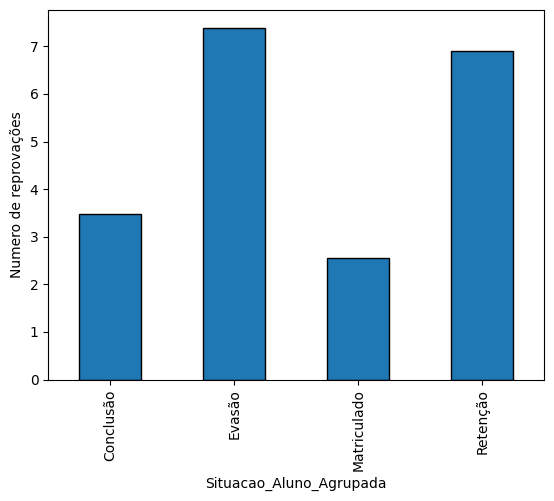

In [ ]:
# Calcular frequência de evasão por gênero
agrup_by_sit = df.groupby('Situacao_Aluno_Agrupada').mean()
agrup_by_sit['Num_Reprovacoes'].plot(kind="bar",edgecolor='black')
plt.ylabel('Numero de reprovações')
plt.show()

**RESPOSTA:** Como vemos, os alunos que evadiram tinha mais reprovações dos que não evadiram, juntamente com os alunos em situação de retenção.

#8 - Qual é a distribuição das notas do ENEM entre os alunos que evadiram?

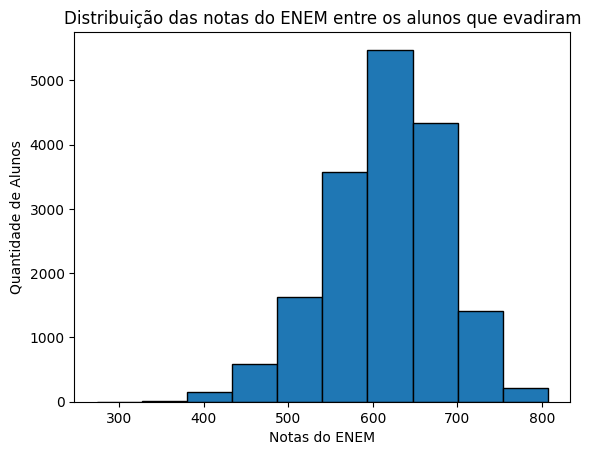

In [ ]:
# Filtrar os alunos que evadiram
alunos_evasao = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']

# Plotar histograma das notas do ENEM dos alunos que evadiram
plt.hist(alunos_evasao['ENEM'], bins=10, edgecolor='black')

# Configurar o título e os rótulos dos eixos
plt.title('Distribuição das notas do ENEM entre os alunos que evadiram')
plt.xlabel('Notas do ENEM')
plt.ylabel('Quantidade de Alunos')

# Exibir o histograma
plt.show()

**RESPOSTA:** 
Como podemos observar o histograma acima, a distribuição das notas do ENEM entre os alunos que evadiram segue uma distribuição normal.

#9 - Existe alguma relação entre a modalidade de inscrição dos alunos e a probabilidade de evasão?

In [45]:
# Obter os valores únicos da coluna 'Codigo_Situacao_Aluno' juntamente com a correspondente 'Situacao_Aluno'
valores_unicos = df.drop_duplicates('Codigo_Situacao_Aluno')[['Codigo_Situacao_Aluno', 'Situacao_Aluno']]

# Imprimir os valores únicos
print("LEGENDA DOS GRÁFICOS")
for index, row in valores_unicos.iterrows():
    codigo = row['Codigo_Situacao_Aluno']
    situacao = row['Situacao_Aluno']
    print(f" {codigo}: {situacao}")


LEGENDA DOS GRÁFICOS
 A: Abandono                                          
 C: Conclusão                                         
 T: Transferência                                     
 M: Mudança de Curso                                  
 D: Desligamento                                      
 F: Falecimento                                       
 X: Exclusão                                          
 H: Habilitação                                       
 B: Concluiu as exigências do curso (não colou grau)  
 N: Normal                                            
 S: Anulação de Matrícula                             
 I: Concluinte (relatório não analisado)              
 Q: Matrícula Condicional/Reconsideração Desligamento 
 R: Reconsideração de Desligamento/Tramitação         
 K: Trancamento                                       
 W: Afastamento Especial                              
 G: Afastamento/Intercâmbio                           
 Y: Afastamento                             

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


<Figure size 800x600 with 0 Axes>

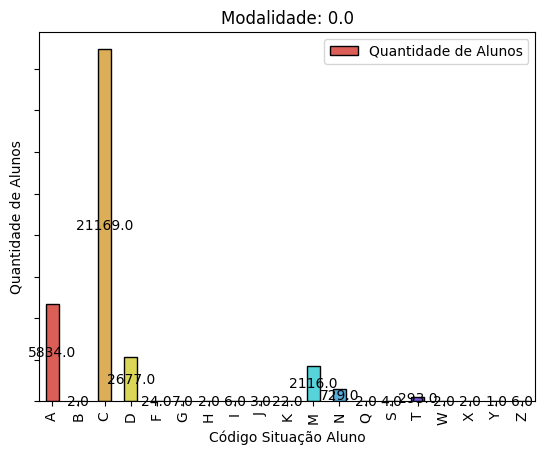

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


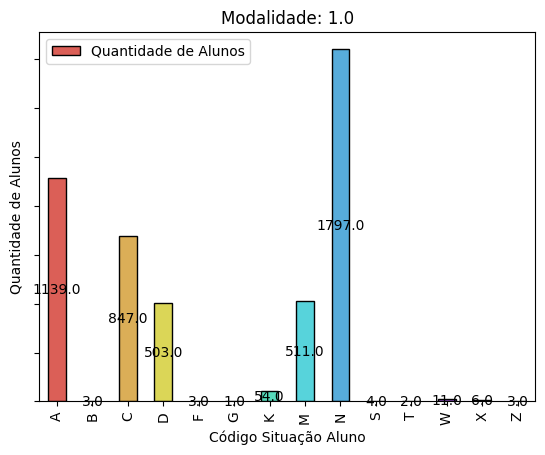

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


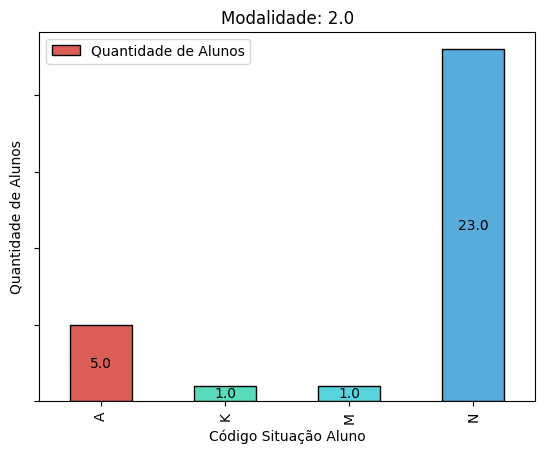

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


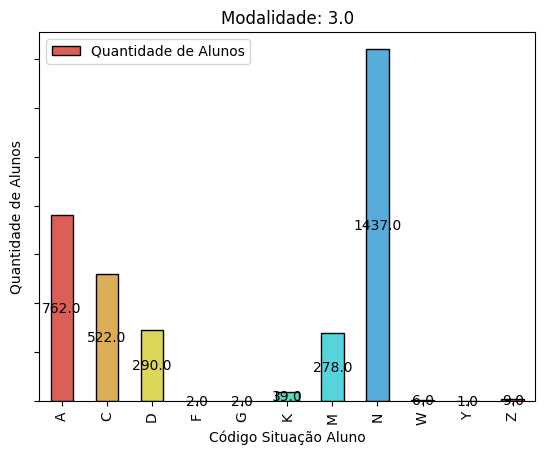

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


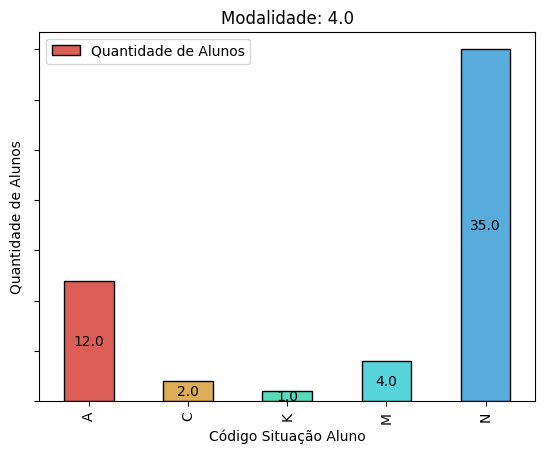

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


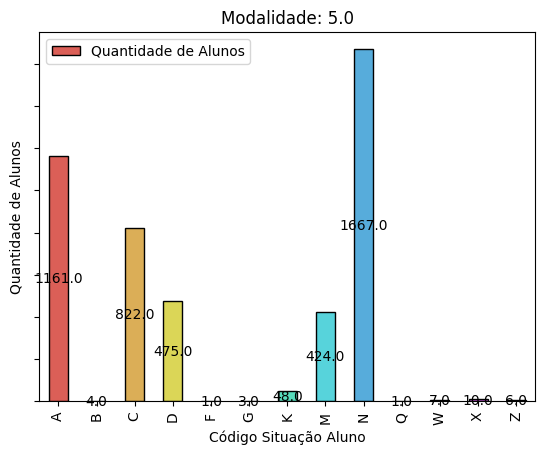

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


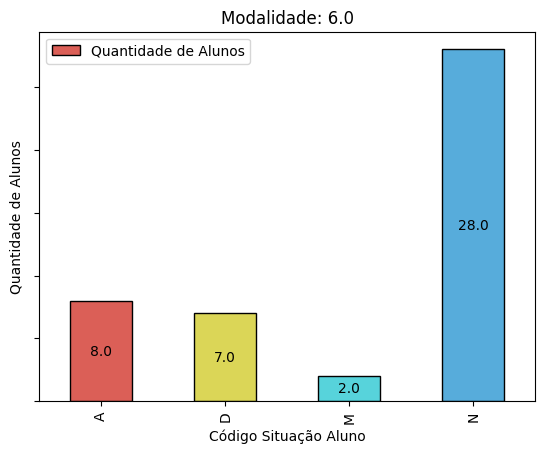

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


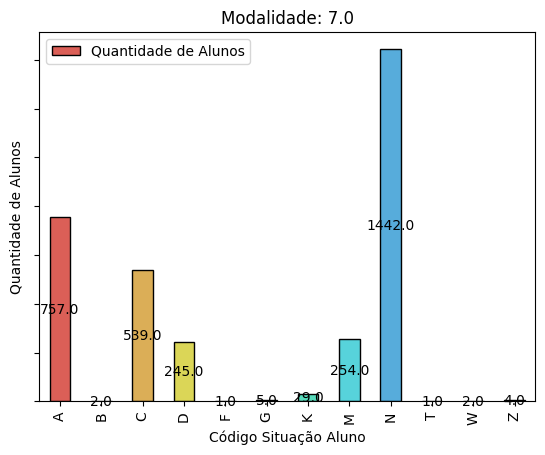

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


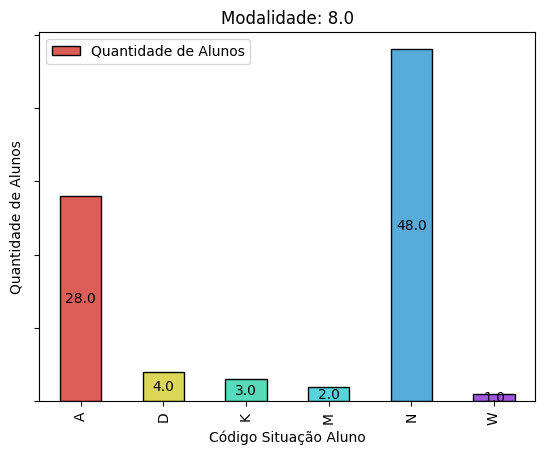

<ipython-input-46-4bc3ee634be3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)


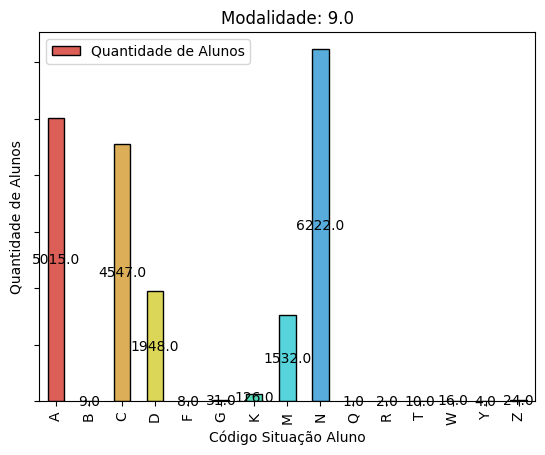

In [46]:
import seaborn as sns

# Filtrar o DataFrame para as combinações com contagem de alunos
datadf_filtrado = datadf[datadf['Codigo_Situacao_Aluno'].notna()]

# Contar a quantidade de alunos em cada combinação de modalidade de inscrição e código de situação
counts = datadf_filtrado.groupby(['Modalidade_Inscrita', 'Codigo_Situacao_Aluno']).size().unstack()

# Remover as colunas que têm contagem de alunos igual a zero
counts = counts.loc[:, (counts > 0).any()]

# Reorganizar os dados
counts = counts.stack().reset_index(name='Quantidade de Alunos')
counts.rename(columns={'Modalidade_Inscrita': 'Modalidade', 'Codigo_Situacao_Aluno': 'Situação'}, inplace=True)

# Obter a lista de modalidades de inscrição
modalidades = counts['Modalidade'].unique()

# Gerar uma lista de cores mapeadas para cada letra
letras_unicas = counts['Situação'].unique()
num_cores = len(letras_unicas)
palette = sns.color_palette('hls', num_cores)
mapeamento_cores = dict(zip(letras_unicas, palette))

# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Iterar sobre as modalidades e criar um gráfico para cada uma
for modalidade in modalidades:
    # Filtrar os dados para a modalidade atual
    data_modalidade = counts[counts['Modalidade'] == modalidade]
    
    # Mapear cada letra a uma cor única
    data_modalidade['Cor'] = data_modalidade['Situação'].map(mapeamento_cores)
    
    # Plotar o gráfico de barras para a modalidade atual com cores diferentes para cada letra
    ax = data_modalidade.plot(x='Situação', y='Quantidade de Alunos', kind='bar', stacked=True, edgecolor='black', color=data_modalidade['Cor'])
    
    # Configurar o título e os rótulos dos eixos para a modalidade atual
    plt.title(f'Modalidade: {modalidade}')
    plt.xlabel('Código Situação Aluno')
    plt.ylabel('Quantidade de Alunos')
    ax.set_yticklabels([])
    
    # Adicionar os valores numéricos em cada barra
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        value = height if height > 0 else ""  # Exibir apenas valores maiores que zero
        ax.annotate(value, (x + width/2, y + height/2), ha='center', va='center')
    
    # Exibir o gráfico para a modalidade atual
    plt.show()



In [47]:
# Filtrar os dados relevantes (Modalidade_Inscrita e Situacao_Aluno_Agrupada)
dados_filtrados = df[['Modalidade_Inscrita', 'Situacao_Aluno_Agrupada']]

# Contar o número de alunos em cada combinação de modalidade de inscrição e situação do aluno
contagem_alunos = dados_filtrados.groupby(['Modalidade_Inscrita', 'Situacao_Aluno_Agrupada']).size().unstack()

# Calcular a proporção de alunos que evadiram em cada modalidade de inscrição
proporcao_evasao = contagem_alunos['Evasão'] / contagem_alunos.sum(axis=1)

# Imprimir a proporção de evasão por modalidade de inscrição
print(proporcao_evasao)


Modalidade_Inscrita
0.0    0.332969
1.0    0.443898
2.0    0.200000
3.0    0.397849
4.0    0.296296
5.0    0.447397
6.0    0.377778
7.0    0.383420
8.0    0.395349
9.0    0.436727
dtype: float64


In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

# Filtrar os dados relevantes para a análise
data = df[['Modalidade_Inscrita', 'Situacao_Aluno_Agrupada']].copy()

# Contar a frequência de cada combinação de modalidade de inscrição e situação de evasão
cross_table = pd.crosstab(data['Modalidade_Inscrita'], data['Situacao_Aluno_Agrupada'])

# Executar o teste do qui-quadrado
chi2, p_value, _, _ = chi2_contingency(cross_table)

# Interpretar os resultados
alpha = 0.05

if p_value < alpha:
    print("Há evidências estatísticas de uma relação entre a modalidade de inscrição e a probabilidade de evasão.")
else:
    print("Não há evidências estatísticas de uma relação entre a modalidade de inscrição e a probabilidade de evasão.")


Há evidências estatísticas de uma relação entre a modalidade de inscrição e a probabilidade de evasão.


**RESPOSTA:** 
Com base nas proporções de evasão por modalidade de inscrição apresentadas, podemos observar que há variações nas taxas de evasão entre as diferentes modalidades. Algumas modalidades apresentam taxas mais altas de evasão, como as modalidades 1.0, 5.0 e 9.0, com proporções de evasão em torno de 44.39%, 44.74% e 43.67%, respectivamente. Por outro lado, outras modalidades, como a modalidade 2.0, apresentam uma proporção de evasão mais baixa, em torno de 20.00%. As demais modalidades estão distribuídas entre esses extremos, com taxas de evasão variando entre 29.63% e 39.78%.

Esses valores mostram as proporções de evasão para cada modalidade de inscrição. É importante ressaltar que proporções mais altas indicam uma maior probabilidade de evasão nessa modalidade em comparação com proporções mais baixas.

Assim, com base nas proporções de evasão e do teste feito acima, é possível inferir que a modalidade de inscrição dos alunos está relacionada à probabilidade de evasão.

# 10 - Qual é a média do CRA dos alunos que permaneceram no curso até a conclusão?



76.38040146566831


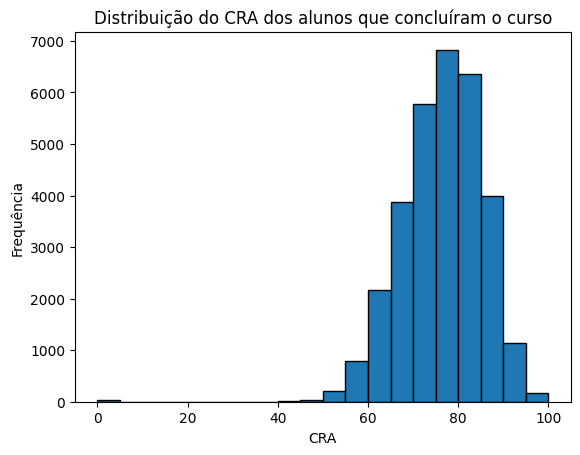

In [ ]:
# Qual é a média do CRA dos alunos que permaneceram no curso até a conclusão?

# Filtrar apenas os alunos que concluíram o curso e não têm valores faltantes em CRA
alunos_conclusao = df[(df['Situacao_Aluno_Agrupada'] == 'Conclusão') & (df['CRA'].notna())]

# Calcular a média do CRA dos alunos que concluíram o curso
media_cra_conclusao = alunos_conclusao['CRA'].mean()


# Imprimir a média do CRA
print((media_cra_conclusao))

#Filtrar apenas os alunos que concluíram o curso e não têm valores faltantes em CRA
alunos_conclusao = df[(df['Situacao_Aluno_Agrupada'] == 'Conclusão') & (df['CRA'].notna())]

# Gerar histograma de CRA dos alunos que concluíram o curso
plt.hist(alunos_conclusao['CRA'], bins=20,edgecolor='black')

# Definir título do gráfico
plt.title('Distribuição do CRA dos alunos que concluíram o curso')

# Definir rótulos dos eixos x e y
plt.xlabel('CRA')
plt.ylabel('Frequência')

# Exibir gráfico
plt.show()



**RESPOSTA:** Ao analisar o gráfico, observamos que a distribuição do CRA (Coeficiente de Rendimento Acadêmico) dos alunos que permaneceram no curso até a conclusão está concentrada principalmente entre 70 e 80. Com base nessa distribuição, podemos afirmar que a média do CRA dos alunos é de 76,38.